In [112]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [113]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [114]:
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


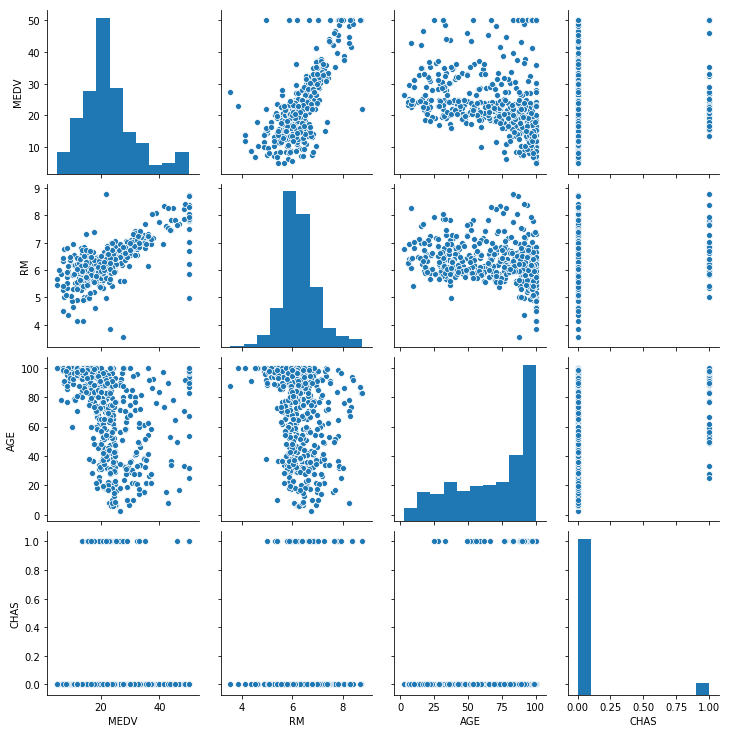

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])
plt.show()

## 방 갯수가 증가할 수록 집 값이 증가
## 주로 나이가 많은 사람들에 대한 데이터가 많다
## 찰스강 주변의 방보다는 찰스강 바깥의 방이 더 많다.

In [116]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


## 1. 당뇨병 예측
### scikit-learn 패키지가 제공하는 당뇨병 진행도 예측용 데이터는 442명의 당뇨병 환자를 대상으로한 검사 결과를 나타내는 데이터이다.

다음과 같은 10 종류의 독립변수를 가지고 있다. 독립변수의 값들은 모두 스케일링(scaling)되었다.

age: 나이
sex: 성별
bmi: BMI(Body mass index)지수
bp: 평균혈압
s1~s6: 6종류의 혈액검사수치
종속변수는 1년 뒤 측정한 당뇨병의 진행률이다.

In [157]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


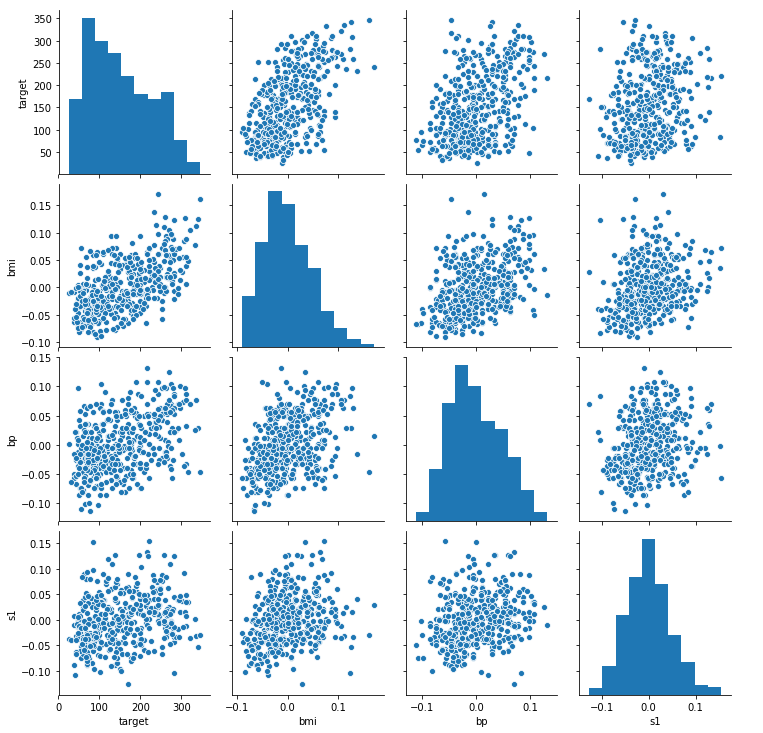

In [158]:
# BMI 지수와 평균혈압이 증가할 수록 당뇨병 진행률이 높아진 것으로 보인다.
# BMI 지수가 증가할 수록 평균 혈압이 높아지는 것을 알수 있다.
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [159]:
df.shape

(442, 11)

In [160]:
X = df.iloc[:,:-1].values
y = df['target'].values
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [162]:
import numpy as np
W = np.random.rand(X.shape[1])
b = np.random.rand()
print("슝=3")

슝=3


In [163]:
def model(X, W, b): 
    predictions = 0 
    for i in range(X.shape[1]): 
        predictions += X[:, i] * W[i] 
        predictions += b 
    return predictions
print("슝=3")

슝=3


In [164]:
def MSE(a, b): 
    mse = ((a - b) ** 2).mean() 
    # 두 값의 차이의 제곱의 평균 
    return mse
print("슝=3")

슝=3


In [165]:
def loss(X, W, b, y): 
    predictions = model(X, W, b) 
    L = MSE(predictions, y) 
    return L
print("슝=3")

슝=3


In [166]:
def gradient(X, W, b, y): # N은 가중치의 개수 
    N = len(W)  # y_pred 준비 
    y_pred = model(X, W, b)  # 공식에 맞게 gradient 계산 
    dW = 1/N * 2 * X.T.dot(y_pred - y)  # b의 gradient 계산 
    db = 2 * (y_pred - y).mean() 
    return dW, db
print("슝=3")

슝=3


In [167]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.66771515  -13.80785949 -189.63028683 -142.73568175  -68.34478566
  -56.12179676  127.79326411 -139.16672962 -182.91918859 -123.54121444]
db: -303.5175654719318


In [168]:
(W-dW)*X-(b-db)

array([[-301.24260599, -302.82453317, -291.81156638, ..., -303.91580768,
        -299.89481039, -305.74823053],
       [-303.66933442, -304.19849947, -313.35278638, ..., -309.05143586,
        -316.11767192, -315.01485759],
       [-298.3746542 , -302.82453317, -295.094038  , ..., -303.91580768,
        -303.02852248, -306.77785576],
       ...,
       [-301.02199431, -302.82453317, -306.58268866, ..., -305.09700217,
        -312.17397463, -301.62972962],
       [-306.31667454, -304.19849947, -296.11981038, ..., -299.85866142,
        -295.36835528, -306.77785576],
       [-306.31667454, -304.19849947, -317.4558759 , ..., -309.05143586,
        -304.33086997, -303.17416746]])

In [170]:
LEARNING_RATE = 0.01

In [171]:
losses = []
for i in range(1, 5001): 
    dW, db = gradient(X_train, W, b, y_train) 
    W -= LEARNING_RATE * dW 
    b -= LEARNING_RATE * db 
    L = loss(X, W, b, y) 
    losses.append(L) 
    if i % 10 == 0: 
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 5869.9487
Iteration 20 : Loss 5411.6231
Iteration 30 : Loss 5203.1013
Iteration 40 : Loss 5015.5222
Iteration 50 : Loss 4846.9914
Iteration 60 : Loss 4695.6259
Iteration 70 : Loss 4559.5081
Iteration 80 : Loss 4436.9174
Iteration 90 : Loss 4326.3330
Iteration 100 : Loss 4226.4123
Iteration 110 : Loss 4135.9699
Iteration 120 : Loss 4053.9595
Iteration 130 : Loss 3979.4564
Iteration 140 : Loss 3911.6441
Iteration 150 : Loss 3849.8006
Iteration 160 : Loss 3793.2876
Iteration 170 : Loss 3741.5406
Iteration 180 : Loss 3694.0599
Iteration 190 : Loss 3650.4032
Iteration 200 : Loss 3610.1786
Iteration 210 : Loss 3573.0388
Iteration 220 : Loss 3538.6759
Iteration 230 : Loss 3506.8165
Iteration 240 : Loss 3477.2178
Iteration 250 : Loss 3449.6643
Iteration 260 : Loss 3423.9639
Iteration 270 : Loss 3399.9459
Iteration 280 : Loss 3377.4581
Iteration 290 : Loss 3356.3648
Iteration 300 : Loss 3336.5448
Iteration 310 : Loss 3317.8897
Iteration 320 : Loss 3300.3026
Iteration 330 : L

No handles with labels found to put in legend.


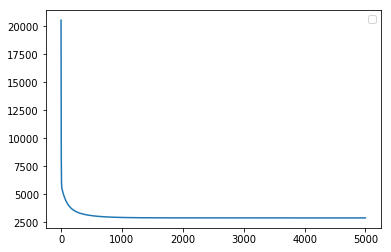

In [172]:
plt.plot(losses)
plt.legend()
plt.show()

In [173]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2884.6255624724045

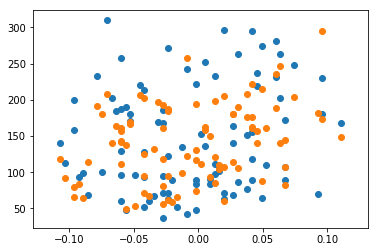

In [174]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

# 2. Bike sharing prediction!
## 날짜의 정보를 받아 얼마나 자전거를 빌리는지 예측하라!

In [137]:
import pandas as pd
train = pd.read_csv('./train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [138]:
train['datetime']= pd.to_datetime(train['datetime'])

In [139]:
train.describe()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [140]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second

In [141]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0


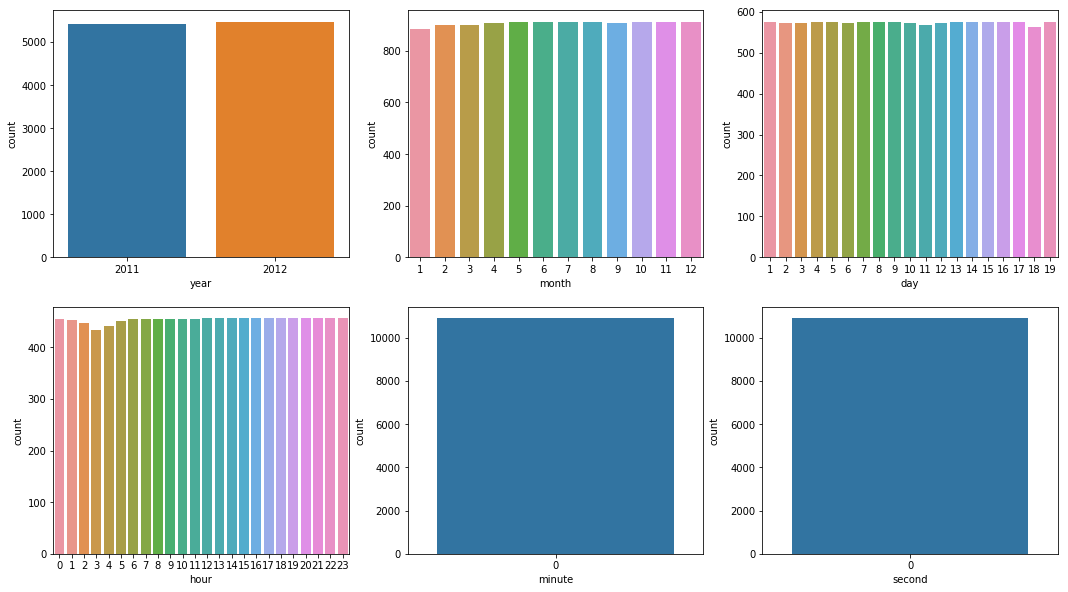

In [142]:
import matplotlib.pyplot as plt 
import seaborn as sns

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.countplot(data=train, x = "year", ax = ax1)
sns.countplot(data=train, x = "month", ax = ax2)
sns.countplot(data=train, x = "day", ax = ax3)
sns.countplot(data=train, x = "hour", ax = ax4)
sns.countplot(data=train, x = "minute", ax = ax5)
sns.countplot(data=train, x = "second", ax = ax6)

# ax1.set(ylabel = "count", title = "Rental amount by year")
# ax2.set(ylabel = "count", title = "Rental amount by month")
# ax3.set(ylabel = "count", title = "Rental amount by day")
# ax4.set(ylabel = "count", title = "Rental amount by hour")

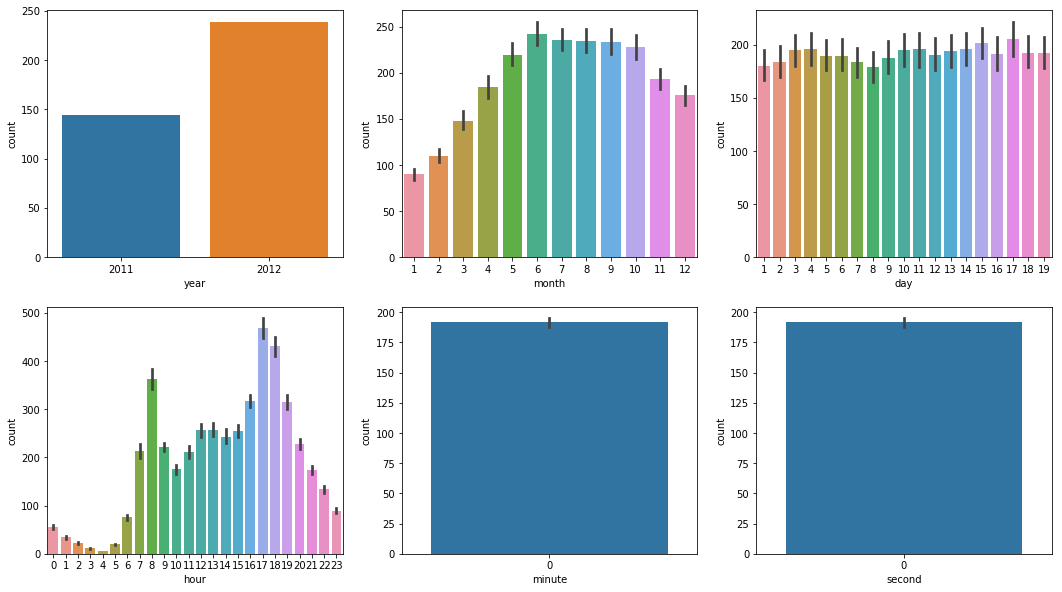

In [143]:
import matplotlib.pyplot as plt 
import seaborn as sns

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,10)

sns.barplot(data=train, x = "year",y = 'count', ax = ax1,ci = None)
sns.barplot(data=train, x = "month",y = 'count', ax = ax2)
sns.barplot(data=train, x = "day",y = 'count', ax = ax3)
sns.barplot(data=train, x = "hour",y = 'count', ax = ax4)
sns.barplot(data=train, x = "minute",y = 'count', ax = ax5)
sns.barplot(data=train, x = "second",y = 'count', ax = ax6)


In [144]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [178]:
# count 칼럼만 제외하기
X = train[train.columns.difference(['datetime','casual', 'registered', 'count','minute', 'second','season'])]
y = train['count']

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [180]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [181]:
model.fit(X_train,y_train)
bike_prediction = model.predict(X_test)

In [182]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, bike_prediction)
rmse = mse**0.5
rmse

141.23518171884498

In [183]:
X_test.head()

,atemp,day,holiday,hour,humidity,month,temp,weather,windspeed,workingday,year
3133,40.150,19,0,11,59,7,33.62,1,0.0000,1,2011
5786,6.820,16,1,6,54,1,4.10,1,6.0032,0,2012
5224,11.365,11,0,18,48,12,9.84,1,12.9980,0,2011
8953,34.090,15,0,10,62,8,29.52,2,12.9980,1,2012
8054,31.060,15,0,23,53,6,25.42,1,16.9979,1,2012


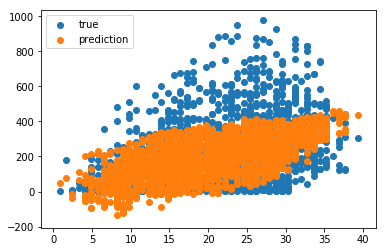

In [184]:
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], bike_prediction,label="prediction")
plt.legend()
plt.show()

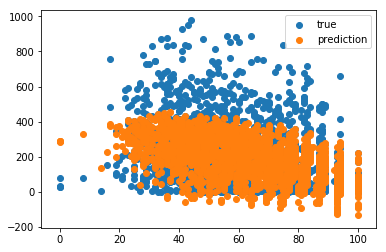

In [152]:
plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], bike_prediction,label="prediction")
plt.legend()
plt.show()

## 결론
### 당뇨병 예측 : learing rate 조정, 학습 횟수를 조정하면서 모델을 훈련합니다.
### Bike sharing prediction : 밑의 correlation heatmap과 변수들간 barplot을 통해 변수들을 선택했습니다.
###                           month의 경우 season과 높은 상관관계를 갖고 있기때문에 count와 상관관계가 더 높은 month만 선택하고 season은 제외했습니다.

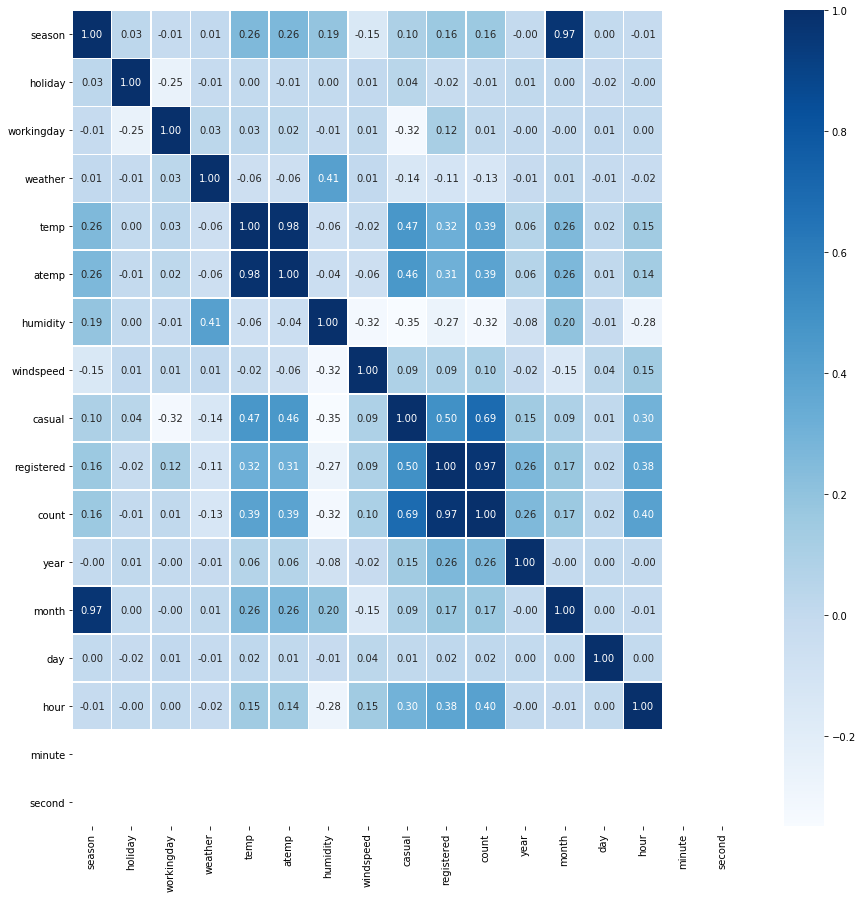

In [177]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')